In [37]:
## Initial imports 
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import os

In [38]:
#confirm csv path
current_dir = os.getcwd()
data_path = os.path.join(current_dir, "Resources", "whale_returns.csv")
print(data_path)

C:\Users\Obiageri\Documents\University of Toronto\Assignment\module_4_challenge\Resources\whale_returns.csv


## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [39]:
#Read the Whale Portfolio daily returns and clean the data.
whale_returns_csv = "Resources\whale_returns.csv"
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [40]:
# Count nulls
whale_return_nan_count = whale_returns_df.isnull().sum()
whale_return_nan_count

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [41]:
# Drop nulls
whale_return_dropnan_df = whale_returns_df.dropna()
whale_return_dropnan_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [42]:
#Read the algorithmic daily returns and clean the data.

algo_returns_csv = "./Resources/algo_returns.csv"
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [43]:
# Count nulls
algo_return_nan_count = algo_returns_df.isnull().sum()
algo_return_nan_count

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [44]:
# Drop nulls
algo_return_dropnan_df = algo_returns_df.dropna()
algo_return_dropnan_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [45]:
#Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 
sp_tsx_history_csv = "Resources\sp_tsx_history.csv"
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv)
sp_tsx_history_df

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"
...,...,...
1813,20-Dec-2019,"$17,118.44"
1814,23-Dec-2019,"$17,128.71"
1815,24-Dec-2019,"$17,180.15"
1816,27-Dec-2019,"$17,168.21"


In [46]:
# Check Data Types
sp_tsx_history_df.dtypes

Date     object
Close    object
dtype: object

In [47]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype("float")
sp_tsx_history_df

,Date,Close
0,1-Oct-2012,12370.19
1,2-Oct-2012,12391.23
2,3-Oct-2012,12359.47
3,4-Oct-2012,12447.68
4,5-Oct-2012,12418.99
...,...,...
1813,20-Dec-2019,17118.44
1814,23-Dec-2019,17128.71
1815,24-Dec-2019,17180.15
1816,27-Dec-2019,17168.21


In [48]:
# Calculate Daily Returns

sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].pct_change()
sp_tsx_history_df


,Date,Close
0,1-Oct-2012,NaN
1,2-Oct-2012,0.001701
2,3-Oct-2012,-0.002563
3,4-Oct-2012,0.007137
4,5-Oct-2012,-0.002305
...,...,...
1813,20-Dec-2019,0.003188
1814,23-Dec-2019,0.000600
1815,24-Dec-2019,0.003003
1816,27-Dec-2019,-0.000695


In [49]:
# Drop nulls
sp_tsx_history_df = sp_tsx_history_df.dropna()
sp_tsx_history_df

,Date,Close
1,2-Oct-2012,0.001701
2,3-Oct-2012,-0.002563
3,4-Oct-2012,0.007137
4,5-Oct-2012,-0.002305
5,9-Oct-2012,-0.011709
...,...,...
1813,20-Dec-2019,0.003188
1814,23-Dec-2019,0.000600
1815,24-Dec-2019,0.003003
1816,27-Dec-2019,-0.000695


In [50]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df = sp_tsx_history_df.rename(columns = {"Close":"Daily Returns"})
sp_tsx_history_df

,Date,Daily Returns
1,2-Oct-2012,0.001701
2,3-Oct-2012,-0.002563
3,4-Oct-2012,0.007137
4,5-Oct-2012,-0.002305
5,9-Oct-2012,-0.011709
...,...,...
1813,20-Dec-2019,0.003188
1814,23-Dec-2019,0.000600
1815,24-Dec-2019,0.003003
1816,27-Dec-2019,-0.000695


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [51]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_data_df = pd.concat(
    [whale_return_dropnan_df, algo_return_dropnan_df, sp_tsx_history_df], axis='columns', join='inner'
)
combined_data_df


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,Date,Daily Returns
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,2014-06-05,0.004062,0.013285,10-Oct-2012,-0.004982
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147,2014-06-06,0.001857,0.008284,11-Oct-2012,0.001763
8,2015-03-12,0.008265,0.010272,0.013117,0.010801,2014-06-09,-0.005012,0.005668,12-Oct-2012,-0.002608
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,2014-06-10,0.004406,-0.000735,15-Oct-2012,0.002288
10,2015-03-16,0.007901,0.003583,0.007953,0.008055,2014-06-11,0.004760,-0.003761,16-Oct-2012,0.014533
...,...,...,...,...,...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,2018-08-03,-0.003656,0.002817,13-Dec-2016,0.006382
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434,2018-08-06,0.000529,0.000285,14-Dec-2016,-0.012225
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223,2018-08-07,0.000207,-0.001330,15-Dec-2016,0.001390
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,2018-08-08,0.008429,-0.001812,16-Dec-2016,0.002227


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:>

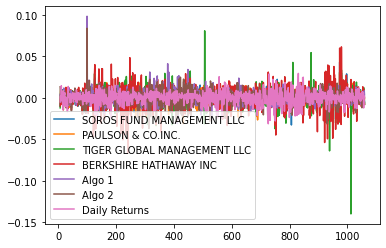

In [52]:
# Plot daily returns of all portfolios
#combined_data_df = combined_data_df.set_index['Date']
combined_data_df.plot()

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

<AxesSubplot:>

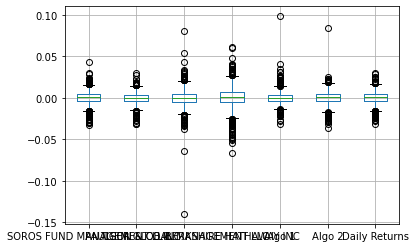

In [74]:
# Box plot to visually show risk
combined_data_df.boxplot()

In [53]:
# Calculate the daily standard deviations of all portfolios
daily_std_combined_data = combined_data_df.std()
daily_std_combined_data 

SOROS FUND MANAGEMENT LLC      0.007855
PAULSON & CO.INC.              0.006988
TIGER GLOBAL MANAGEMENT LLC    0.010845
BERKSHIRE HATHAWAY INC         0.012850
Algo 1                         0.007745
Algo 2                         0.008265
Daily Returns                  0.007421
dtype: float64

In [54]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_sp_tsx_df = sp_tsx_history_df.std()
daily_std_sp_tsx_df

# Determine which portfolios are riskier than the S&P TSX 60


Daily Returns    0.006637
dtype: float64

In [55]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_combined_data = daily_std_combined_data *np.sqrt(252)
annualized_std_combined_data 

SOROS FUND MANAGEMENT LLC      0.124700
PAULSON & CO.INC.              0.110926
TIGER GLOBAL MANAGEMENT LLC    0.172156
BERKSHIRE HATHAWAY INC         0.203994
Algo 1                         0.122946
Algo 2                         0.131206
Daily Returns                  0.117809
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

In [56]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_combined_data = combined_data_df.rolling(window=21).mean()
rolling_std_combined_data.tail(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
1050,0.001305,-2.516183e-04,0.000996,0.001581,-0.000922,0.000730,0.001529
1051,0.001597,1.953116e-05,0.001376,0.001691,-0.001125,0.000535,0.001867
1052,0.000754,-5.556595e-04,0.000303,0.001004,-0.000908,0.000733,0.001712
1053,0.001937,2.625556e-04,0.001408,0.002981,-0.000578,0.000493,0.001815
1054,0.002204,3.305858e-04,0.001172,0.002166,-0.000603,0.000467,0.002349
1055,0.001982,5.009154e-07,0.000489,0.002140,-0.000607,0.000235,0.002512
1056,0.002560,7.854086e-04,0.001281,0.002925,-0.000547,-0.000012,0.001416
1057,0.002466,1.246472e-03,0.001296,0.002890,-0.001062,-0.000338,0.001556
1058,0.002339,9.968624e-04,0.001344,0.002105,-0.000487,-0.000237,0.001361
1059,0.001632,4.533365e-04,0.000777,0.001104,-0.000416,0.000145,0.001295


<AxesSubplot:>

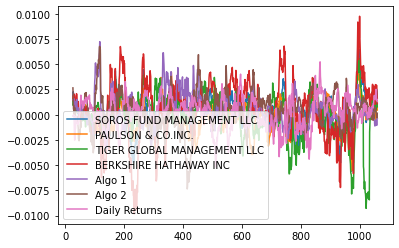

In [57]:
# Plot the rolling standard deviation
combined_data_df.rolling(window=21).mean().plot()


In [58]:
# Calculate the correlation
correlation_combined_data = combined_data_df.corr()
correlation_combined_data


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.700191,0.561548,0.754025,-0.013205,-0.003091,-0.040365
PAULSON & CO.INC.,0.700191,1.000000,0.435163,0.545549,-0.030506,-0.026532,-0.028134
TIGER GLOBAL MANAGEMENT LLC,0.561548,0.435163,1.000000,0.424908,-0.014538,-0.039470,-0.027807
BERKSHIRE HATHAWAY INC,0.754025,0.545549,0.424908,1.000000,-0.005687,-0.025006,-0.045502
Algo 1,-0.013205,-0.030506,-0.014538,-0.005687,1.000000,0.327996,0.016694
Algo 2,-0.003091,-0.026532,-0.039470,-0.025006,0.327996,1.000000,-0.005961
Daily Returns,-0.040365,-0.028134,-0.027807,-0.045502,0.016694,-0.005961,1.000000


<AxesSubplot:>

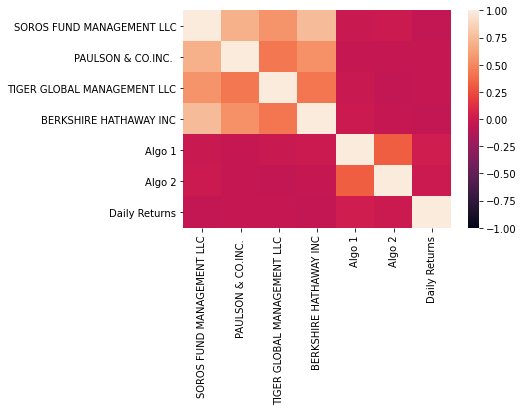

In [59]:
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation_combined_data, vmin =-1, vmax = 1)



### 3) Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.




In [62]:
# Calculate 60-day rolling covariance of Algo 2 vs. S&P TSX 60
rolling_covariance_algo2_data = combined_data_df['Algo 2'].rolling(window=60).cov(combined_data_df['Daily Returns'])
rolling_covariance_algo2_data


6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
          ...   
1055   -0.000005
1056   -0.000005
1057   -0.000005
1058   -0.000005
1059   -0.000005
Length: 1054, dtype: float64

In [64]:
# Calculate 60-day rolling variance of S&P TSX 60
rolling_variance_sptsx_data = combined_data_df['Daily Returns'].rolling(window=60).var()
rolling_variance_sptsx_data

6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
          ...   
1055    0.000031
1056    0.000034
1057    0.000032
1058    0.000031
1059    0.000030
Name: Daily Returns, Length: 1054, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 2'}>

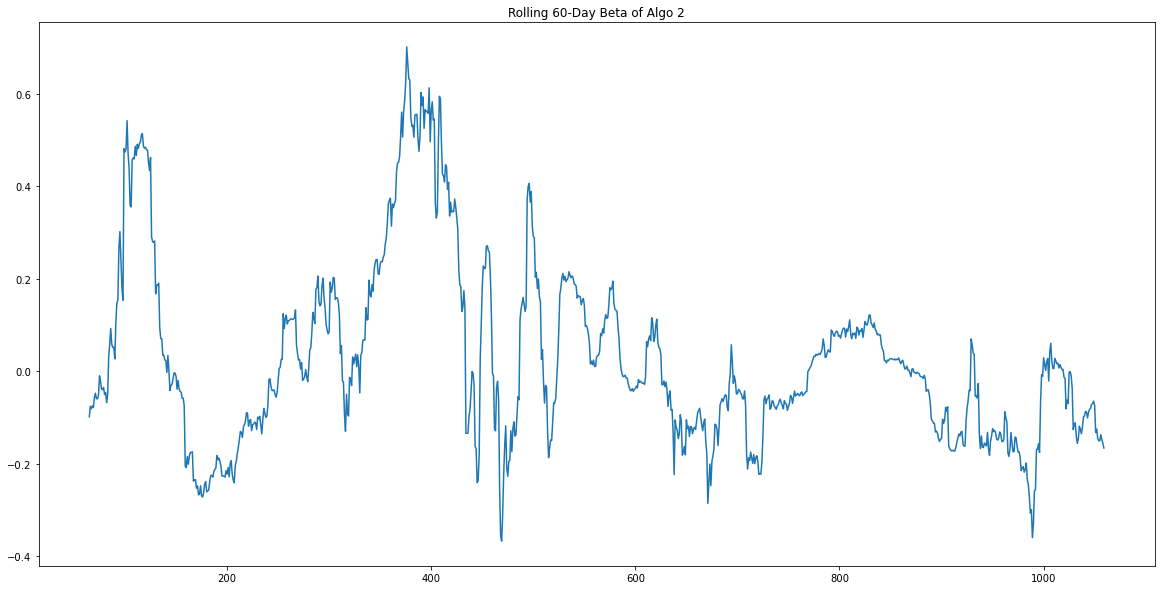

In [65]:
# Calculate 60-day rolling beta of Algo 2 and plot the data
rolling_beta_algo2_data = rolling_covariance_algo2_data / rolling_variance_sptsx_data
rolling_beta_algo2_data.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 2')


In [70]:
# Calculate variance of S&P TSX
variance_sp_tsx_data = combined_data_df['Daily Returns'].var()
variance_sp_tsx_data

5.507503418889542e-05

In [71]:
# Calculate covariance of a single portfolio
covariance_algo2_data = combined_data_df['Algo 2'].cov(combined_data_df['Daily Returns'])
covariance_algo2_data


-3.65640063517987e-07

In [72]:
# Computing beta
beta_algo2_data = covariance_algo2_data/variance_sp_tsx_data
beta_algo2_data


-0.0066389439226478

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [76]:
# Annualized Sharpe Ratios

sharpe_ratios_combined_date = ((combined_data_df.mean()-combined_data_df['Daily Returns'].mean())*252) / (combined_data_df.std() * np.sqrt(252))
sharpe_ratios_combined_date


SOROS FUND MANAGEMENT LLC     -0.107382
PAULSON & CO.INC.             -1.003503
TIGER GLOBAL MANAGEMENT LLC   -0.457721
BERKSHIRE HATHAWAY INC         0.343700
Algo 1                         0.589425
Algo 2                         0.353566
Daily Returns                  0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

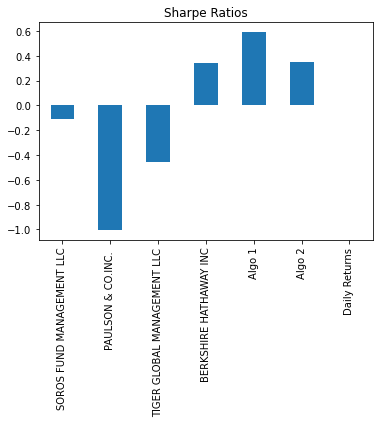

In [77]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_combined_date.plot(kind="bar", title = "Sharpe Ratios")


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Response: Yes, the algorithmic strategies out performs the Whale portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [130]:
# Reading data from 1st stock
l_historical_csv = "Resources\l_historical.csv"
l_historical_df = pd.read_csv(l_historical_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
l_historical_df = l_historical_df.rename(columns = {"Close":"L Close"})
l_historical_df

,Symbol,L Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [107]:
# Reading data from 2nd stock
otex_historical_csv = "Resources\otex_historical.csv"
otex_historical_df = pd.read_csv(otex_historical_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
otex_historical_df = otex_historical_df.rename(columns = {"Close":"Otex Close"})
otex_historical_df

,Symbol,Otex Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [106]:
# Reading data from 3rd stock

shop_historical_csv =  "Resources\shop_historical.csv"
shop_historical_df = pd.read_csv(shop_historical_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
shop_historical_df = shop_historical_df.rename(columns = {"Close":"Shop Close"})
shop_historical_df

,Symbol,Shop Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [108]:
# Combine all stocks in a single DataFrame
combined_historical_data_df = pd.concat(
    [l_historical_df, otex_historical_df, shop_historical_df], axis='columns', join='inner'
)
combined_historical_data_df


,Symbol,L Close,Symbol,Otex Close,Symbol,Shop Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51
...,...,...,...,...,...,...
2019-12-20,L,67.90,OTEX,58.68,SHOP,513.22
2019-12-23,L,67.68,OTEX,57.89,SHOP,511.62
2019-12-24,L,67.67,OTEX,57.44,SHOP,525.39


In [135]:
# Calculate daily returns

l_historical_df["L Close"] = l_historical_df["L Close"].pct_change()
l_historical_df
otex_historical_df["Otex Close"] = otex_historical_df["Otex Close"].pct_change()
otex_historical_df
shop_historical_df['Shop Close'] = shop_historical_df['Shop Close'].pct_change()
shop_historical_df

all_historical_data_df = pd.concat(
    [l_historical_df, otex_historical_df, shop_historical_df], axis='columns', join='inner'
)
all_historical_data_df


,Symbol,L Close,Symbol,Otex Close,Symbol,Shop Close
Date,,,,,,
2018-01-02,L,NaN,OTEX,NaN,SHOP,NaN
2018-01-03,L,NaN,OTEX,NaN,SHOP,NaN
2018-01-04,L,NaN,OTEX,NaN,SHOP,-0.269519
2018-01-05,L,NaN,OTEX,NaN,SHOP,-1.085125
2018-01-08,L,NaN,OTEX,-0.695553,SHOP,-12.266392
...,...,...,...,...,...,...
2019-12-20,L,-3.742853,OTEX,-0.736492,SHOP,-0.363386
2019-12-23,L,-1.597837,OTEX,-0.700768,SHOP,-0.433502
2019-12-24,L,0.466940,OTEX,-0.079226,SHOP,-9.633165


In [146]:
# Drop NAs
all_historical_data_df = all_historical_data_df.dropna()
all_historical_data_df

,Symbol,L Close,Symbol,Otex Close,Symbol,Shop Close
Date,,,,,,
2018-01-09,L,-1.000000,OTEX,5.541667,SHOP,-1.686524
2018-01-10,L,-0.195628,OTEX,-0.063144,SHOP,-1.869659
2018-01-11,L,-6.575028,OTEX,-0.625549,SHOP,-1.110034
2018-01-12,L,1.968926,OTEX,-0.700558,SHOP,-11.811643
2018-01-15,L,-1.066737,OTEX,3.595528,SHOP,0.244767
...,...,...,...,...,...,...
2019-12-20,L,-3.742853,OTEX,-0.736492,SHOP,-0.363386
2019-12-23,L,-1.597837,OTEX,-0.700768,SHOP,-0.433502
2019-12-24,L,0.466940,OTEX,-0.079226,SHOP,-9.633165


<AxesSubplot:xlabel='Date'>

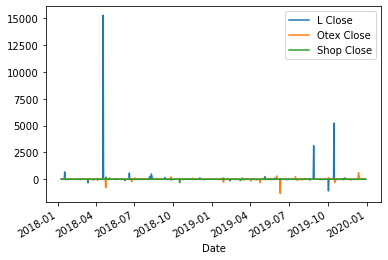

In [147]:
# plot sample data
all_historical_data_df.plot()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [149]:
# Set weights
weights = [1/3, 1/3, 1/3]

L_weight = 1/3
Otex_weight = 1/3
Shop_weight = 1/3

all_historical_portfolio_returns = L_weight * all_historical_data_df["L Close"] + Shop_weight * all_historical_data_df["Shop Close"] + Otex_weight* all_historical_data_df['Otex Close']
all_historical_portfolio_returns


Date
2018-01-09    0.951714
2018-01-10   -0.709477
2018-01-11   -2.770204
2018-01-12   -3.514425
2018-01-15    0.924519
                ...   
2019-12-20   -1.614244
2019-12-23   -0.910703
2019-12-24   -3.081817
2019-12-27    2.241222
2019-12-30   -1.473396
Length: 496, dtype: float64

<AxesSubplot:xlabel='Date'>

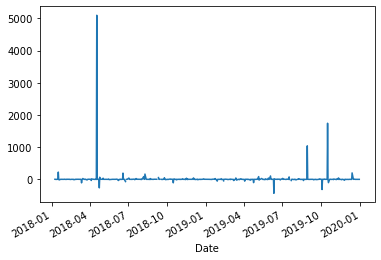

In [150]:
# plot sample data
all_historical_portfolio_returns.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [153]:
# Join your returns DataFrame to the original returns DataFrame

join_return_data_df = pd.concat([all_historical_data_df,all_historical_portfolio_returns], axis = 'columns', join = 'inner')
join_return_data_df = join_return_data_df.rename(columns = {0:'Weighted Return'})
join_return_data_df


,Symbol,L Close,Symbol,Otex Close,Symbol,Shop Close,Weighted Return
Date,,,,,,,
2018-01-09,L,-1.000000,OTEX,5.541667,SHOP,-1.686524,0.951714
2018-01-10,L,-0.195628,OTEX,-0.063144,SHOP,-1.869659,-0.709477
2018-01-11,L,-6.575028,OTEX,-0.625549,SHOP,-1.110034,-2.770204
2018-01-12,L,1.968926,OTEX,-0.700558,SHOP,-11.811643,-3.514425
2018-01-15,L,-1.066737,OTEX,3.595528,SHOP,0.244767,0.924519
...,...,...,...,...,...,...,...
2019-12-20,L,-3.742853,OTEX,-0.736492,SHOP,-0.363386,-1.614244
2019-12-23,L,-1.597837,OTEX,-0.700768,SHOP,-0.433502,-0.910703
2019-12-24,L,0.466940,OTEX,-0.079226,SHOP,-9.633165,-3.081817


In [155]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
join_return_data_df.dropna()

,Symbol,L Close,Symbol,Otex Close,Symbol,Shop Close,Weighted Return
Date,,,,,,,
2018-01-09,L,-1.000000,OTEX,5.541667,SHOP,-1.686524,0.951714
2018-01-10,L,-0.195628,OTEX,-0.063144,SHOP,-1.869659,-0.709477
2018-01-11,L,-6.575028,OTEX,-0.625549,SHOP,-1.110034,-2.770204
2018-01-12,L,1.968926,OTEX,-0.700558,SHOP,-11.811643,-3.514425
2018-01-15,L,-1.066737,OTEX,3.595528,SHOP,0.244767,0.924519
...,...,...,...,...,...,...,...
2019-12-20,L,-3.742853,OTEX,-0.736492,SHOP,-0.363386,-1.614244
2019-12-23,L,-1.597837,OTEX,-0.700768,SHOP,-0.433502,-0.910703
2019-12-24,L,0.466940,OTEX,-0.079226,SHOP,-9.633165,-3.081817


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [160]:

daily_std_join_return_df = join_return_data_df.std()
daily_std_join_return_df

# Calculate the annualized `std`
annualized_std_join_return_data_df = daily_std_join_return_df * np.sqrt(252)
annualized_std_join_return_data_df


L Close                   NaN
Otex Close                NaN
Shop Close         299.308067
Weighted Return           NaN
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [161]:
# Calculate rolling standard deviation
rolling_std_join_return_df = join_return_data_df.rolling(window=21).mean()
rolling_std_join_return_df


,L Close,Otex Close,Shop Close,Weighted Return
Date,,,,
2018-01-09,NaN,NaN,NaN,NaN
2018-01-10,NaN,NaN,NaN,NaN
2018-01-11,NaN,NaN,NaN,NaN
2018-01-12,NaN,NaN,NaN,NaN
2018-01-15,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-12-20,-2.498860,25.413166,-2.014015,6.966764
2019-12-23,-2.065043,25.391777,-2.027320,7.099805
2019-12-24,-1.987611,29.424299,-2.331169,8.368506


In [ ]:
# Plot rolling standard deviation
rolling_std_join_return_df.plot()

### Calculate and plot the correlation

In [164]:
# Calculate the correlation
correlation_join_return_data_df = join_return_data_df.corr()
correlation_join_return_data_df

,L Close,Otex Close,Shop Close,Weighted Return
L Close,1.000000,-0.005270,0.003403,0.993533
Otex Close,-0.005270,1.000000,-0.008624,0.105461
Shop Close,0.003403,-0.008624,1.000000,0.027672
Weighted Return,0.993533,0.105461,0.027672,1.000000


<AxesSubplot:>

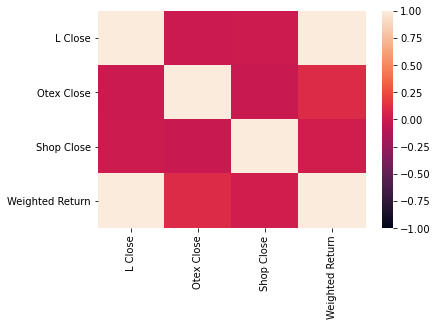

In [167]:
# Plot the correlation
sns.heatmap(correlation_join_return_data_df,vmin =-1, vmax = 1)


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta

# Calculate 60-day rolling covariance of Algo 2 vs. S&P TSX 60
rolling_covariance_algo2_data = combined_data_df['Algo 2'].rolling(window=60).cov(combined_data_df['Daily Returns'])
rolling_covariance_algo2_data

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_join_return_data_df = ((join_return_data_df.mean()-join_return_data_df['Weighted Return'].mean())*252)/ (join_return_data_df() * np.sqrt(252))
sharpe_ratios_join_return_data_df


In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_join_return_data_df.plot(kind="bar", title = "Sharpe Ratios")